# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest classifier, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)
The URL here has many query parameters
- q for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- l for a location
- start for what result number to start on

In [17]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&limit=50&start=10"


In [375]:
import pandas as pd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
r = requests.get(URL)
#r.status_code
soup = BeautifulSoup(r.text, "html.parser")
results_try = soup('div', 'result')

In [73]:
len(results_try)

55

## Write 4 functions to extract these items (one function for each): location, company, job title, and salary.¶
Example
```python
def extract_location_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [23]:
# Create empty DF and function to scrape soup for data.

columns = ['title', 'company', 'location', 'salary', 'summary']
jobs = pd.DataFrame(columns=columns)
def get_data(results):
    #columns = ['title', 'company', 'location', 'salary', 'summary']
    #jobs = pd.DataFrame(columns=columns)
    for item in results:
        # Title
        title = item.find('a').get_text()
        # Company
        try:
            company = item.find('span', attrs={'class':'company'}).get_text().strip()
        except:
            company = item.find('span', attrs={'itemprop':'name'})
        # Location
        try:
            location = item.find('span', attrs={'class':'location'}).get_text().strip()
        except:
            location = item.find('span', attrs={'itemprop':'addressLocality'})
        # Salary
        try: 
            salary = item.find('span', attrs={'class':'no-wrap'}).get_text()
        except:
            try:
                salary = item.find('div', attrs={'class':'sjcl'}).find('div').get_text().strip()
            except:
                try:
                    salary = item.find('nobr').get_text().strip()
                except:
                    salary = np.nan
        # Summary
        summary = item.find('span', attrs={'class':'summary'}).get_text().strip()
        jobs.loc[len(jobs)] = [title, company, location, salary, summary]
   

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.
- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the l=New+York and the start=10. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).
##### Complete the following code to collect results from multiple cities and starting points.
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [346]:
# Searched through all these cities in different configurations.

cities_all = ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
              'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh',
              'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Raleigh', 
              'San+Antonio', 'St+Louis', 'Oakland', 'San+Jose', 'Durham', 
              'Minneapolis', 'San+Diego', 'Detroit', 'Kansas+City', 'Cleveland', 
              'Charlotte', 'Orlando', 'Newark', 'Boston', 'Baltimore'
              'Cambridge+MA', 'Sunnyvale', 'Loiusville', 'New+Orleans',
              'Jacksonville', 'Columbus', 'Indianapolis', 'El+Paso', 'Nashville'
              'Memphis', 'Las+Vegas', 'Milwakee', 'Sacramento', 'Omaha']
second_cities = ['Cleveland', 
              'Charlotte', 'Orlando', 'Newark', 'Boston', 'Baltimore'
              'Cambridge+MA', 'Sunnyvale', 'Loiusville', 'New+Orleans',
              'Jacksonville', 'Columbus', 'Indianapolis', 'El+Paso', 'Nashville'
              'Memphis', 'Las+Vegas', 'Milwakee', 'Sacramento', 'Omaha']
third_cities = ['Tucson', 'Fresno', 'Long+Beach', 'Colorado+Springs', 'Palo+Alto', 'Mountain+View'
                'Virginia+Beach', 'Tampa', 'Anaheim', 'Santa+Ana', 'Riverside', 'Stockton', 'Henderson'
                'Irvine', 'Huntsville', 'Thousand+Oaks', 'Rochester']
fourth_cities = ['Anchorage', 'Plano', 'Greensboro', 'Lincoln', 'Toledo'
                 'Laredo', 'Buffalo', 'Madison', 'Scottsdale', 'Reno',
                 'Norfolk', 'Cheasapeake', 'Langley', 'Fremont', 'Menlo+Park']
fifth_cities = ['Richmond', 'San+Bernardino', 'Spokane', 'Olympia', 'Takoma'
                'Modesto', 'Fontana', 'Oxnard', 'Glendale', 'Amarillo', 'Akron'
                'Salt+Lake+City', 'Tallahassee', 'Providence', 'Oceanside', 'Santa+Rosa']
cities_small = ['New+York', 'Washington+DC', 'San+Francisco']

#### Scraped a bunch of times with different cities and max amounts, so this code won't rerun well. 


In [347]:
# WebScraping Indeed.com for data scientist data.

url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}limit=50&start={}"
max_results_per_city = 950 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []
x = 1
for city in cities_small:
    for start in range(0, max_results_per_city, 50):
        url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=" + city + "&limit=50&start=" + str(start)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        for result in soup('div', 'result'):
            results.append(result)
        sleep(1)
        print 'Scraped page',x
        x +=1

Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
Scraped page 11
Scraped page 12
Scraped page 13
Scraped page 14
Scraped page 15
Scraped page 16
Scraped page 17
Scraped page 18
Scraped page 19
Scraped page 20
Scraped page 21
Scraped page 22
Scraped page 23
Scraped page 24
Scraped page 25
Scraped page 26
Scraped page 27
Scraped page 28
Scraped page 29
Scraped page 30
Scraped page 31
Scraped page 32
Scraped page 33
Scraped page 34
Scraped page 35
Scraped page 36
Scraped page 37
Scraped page 38
Scraped page 39
Scraped page 40
Scraped page 41
Scraped page 42
Scraped page 43
Scraped page 44
Scraped page 45
Scraped page 46
Scraped page 47
Scraped page 48
Scraped page 49
Scraped page 50
Scraped page 51
Scraped page 52
Scraped page 53
Scraped page 54
Scraped page 55
Scraped page 56
Scraped page 57


In [348]:
len(results)

3135

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [349]:
# Create empty DF and fill it with cleaned results.

columns = ['title', 'company', 'location', 'salary', 'summary']
jobs = pd.DataFrame(columns=columns)
get_data(results)

In [350]:
# Drop duplicates.

jobs_deduped = jobs.drop_duplicates()

In [352]:
# Select jobs with yearly salary data.

jobs_with_sal = jobs_deduped[jobs_deduped.salary.notnull()&jobs_deduped.salary.str.contains('year')]

In [354]:
# Write DF to CSV. I did this a bunch of times, hence the different numbers on files.

jobs_with_sal.to_csv('../files/some_sals8.csv', index=False, encoding='utf-8')

In [355]:
# Reading in and combining all CSV's.

df1 = pd.read_csv('../files/some_sals.csv')
df2 = pd.read_csv('../files/some_sals2.csv')
df3 = pd.read_csv('../files/some_sals3.csv')
df4 = pd.read_csv('../files/some_sals4.csv')
df5 = pd.read_csv('../files/some_sals5.csv')
df6 = pd.read_csv('../files/some_sals6.csv')
df7 = pd.read_csv('../files/some_sals7.csv')
df8 = pd.read_csv('../files/some_sals8.csv')

df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [359]:
# Select acceptable entries and reset index of DF.

final_jobs = df_all.drop_duplicates()
final_jobs.reset_index(inplace=True)
final_jobs = final_jobs.drop('index', axis=1)

### Salary

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [361]:
# Remove words and symbols from salaries.

final_jobs.salary = final_jobs.salary.str.replace('a year', '').str.replace(',', '').str.replace('$','')

In [362]:
# Convert salaries to floats, computing the average if necessary.

cleaned_salaries = []
for entry in final_jobs.salary:
    sal = entry.split('-')
    
    if len(sal) == 2:
        sal_range = []
        for x in sal:
            sal_range.append(float(x.strip()))
        real_sal = np.mean(sal_range)
        cleaned_salaries.append(real_sal)
    else:
        for x in sal:
            real_sal = x.strip()
            cleaned_salaries.append(float(real_sal))
        
final_jobs['salary'] = cleaned_salaries
final_jobs.head()

,title,company,location,salary,summary
0,Data Scientist/Statistician (Statistical Model...,"Quintrix Solutions, Inc",New York State,135000.0,The starting salary for the Data Scientist pos...
1,Data Manager/Statistician,Stony Brook University,"Stony Brook, NY",57000.0,Compliant data analysis. Biostatistics and dat...
2,"Scientist, Bureau of Environmental Sciences an...",DEPT OF HEALTH/MENTAL HYGIENE,"Queens, NY",62693.0,-Supporting the development and implementation...
3,Climate and Sustainability Analyst,DEPT OF ENVIRONMENT PROTECTION,"New York, NY",65977.0,Knowledge and practical application of quantit...
4,"Criminal Justice Analyst, Bureau of Mental Health",DEPT OF HEALTH/MENTAL HYGIENE,"Queens, NY",79249.5,"Develop expertise in Maven, and other availabl..."


In [363]:
final_jobs.shape

(582, 5)

### Save your results as a CSV

In [364]:
# Export to csv

final_jobs.to_csv('../files/final_jobs.csv', index=False, encoding='utf-8')

## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [718]:
df = pd.read_csv('../files/final_jobs_clean.csv')

In [366]:
df.describe()

,salary
count,582.000000
mean,97333.935567
std,43617.814630
min,22500.000000
25%,65000.000000
50%,90000.000000
75%,120000.000000
max,300000.000000


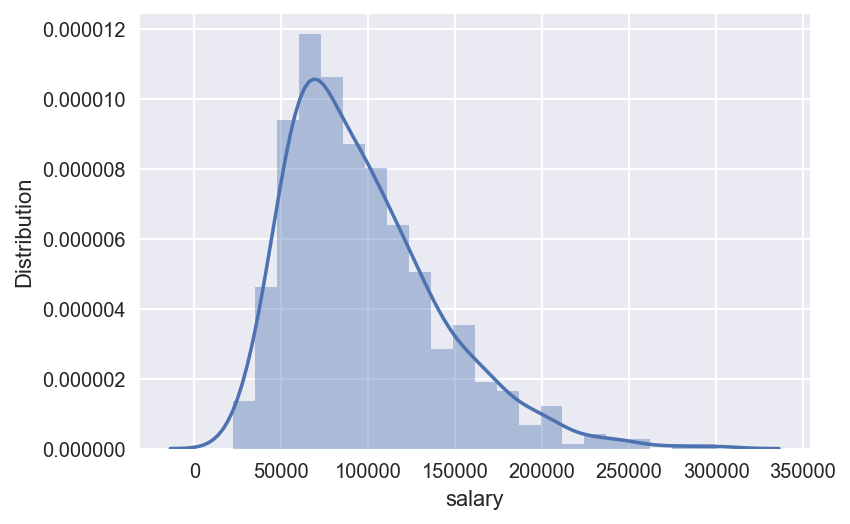

In [379]:
# Plot distribution of salaries.

sns.distplot(df.salary)
plt.ylabel('Distribution')

In [390]:
df.groupby('location').salary.median()

location
Anchorage          94426.50
Atlanta            86400.00
Austin            130000.00
Baltimore          70282.50
Boston            108697.50
Buffalo            51238.00
Charlotte         131250.00
Chicago           108750.00
Cleveland          56500.00
Columbus           71750.00
Dallas             72500.00
Denver             68163.50
Detroit            74950.00
Durham            109665.25
El Paso            66691.00
Henderson          67500.00
Houston            64750.00
Huntsville         87735.50
Indianapolis       57623.50
Irvine             81317.50
Jacksonville       32500.00
Las Vegas         138750.00
Los Angeles       108738.00
Madison           155000.00
Miami              75400.00
Minneapolis       115000.00
New Jersey        142500.00
New Orleans        60434.00
New York           78790.50
Norfolk            73067.25
Omaha              51900.00
Orlando            37000.00
Philadelphia      120000.00
Phoenix            55367.50
Pittsburgh         80000.00
Portland   

In [392]:
df.groupby('location').describe()

high_salary                                                 \
                     count      mean       std  min   25%  50%   75%  max   
location                                                                    
Anchorage              2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
Atlanta               25.0  0.480000  0.509902  0.0  0.00  0.0  1.00  1.0   
Austin                 7.0  0.857143  0.377964  0.0  1.00  1.0  1.00  1.0   
Baltimore             23.0  0.260870  0.448978  0.0  0.00  0.0  0.50  1.0   
Boston                15.0  0.800000  0.414039  0.0  1.00  1.0  1.00  1.0   
Buffalo                2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Charlotte             10.0  0.600000  0.516398  0.0  0.00  1.0  1.00  1.0   
Chicago               32.0  0.750000  0.439941  0.0  0.75  1.0  1.00  1.0   
Cleveland              4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Columbus               2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Dallas                 9.0  0.222222  0.440959  0.0  0.00  0.0  0.00  1.0   
Denver                 8.0  0.375000  0.517549  0.0  0.00  0.0  1.00  1.0   
Detroit                4.0  0.500000  0.577350  0.0  0.00  0.5  1.00  1.0   
Durham                 2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
El Paso                1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Henderson              1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Houston               24.0  0.208333  0.414851  0.0  0.00  0.0  0.00  1.0   
Huntsville             1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Indianapolis           3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Irvine                10.0  0.500000  0.527046  0.0  0.00  0.5  1.00  1.0   
Jacksonville           1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Las Vegas              2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
Los Angeles           22.0  0.636364  0.492366  0.0  0.00  1.0  1.00  1.0   
Madison               11.0  0.818182  0.404520  0.0  1.00  1.0  1.00  1.0   
Miami                  8.0  0.250000  0.462910  0.0  0.00  0.0  0.25  1.0   
Minneapolis            2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
New Jersey             2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
New Orleans            3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0   
New York              91.0  0.362637  0.483425  0.0  0.00  0.0  1.00  1.0   
Norfolk                4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0   
Omaha                  1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Orlando                1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
Philadelphia          25.0  0.840000  0.374166  0.0  1.00  1.0  1.00  1.0   
Phoenix               10.0  0.200000  0.421637  0.0  0.00  0.0  0.00  1.0   
Pittsburgh             6.0  0.333333  0.516398  0.0  0.00  0.0  0.75  1.0   
Portland               8.0  0.125000  0.353553  0.0  0.00  0.0  0.00  1.0   
Providence             2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Raleigh               12.0  0.750000  0.452267  0.0  0.75  1.0  1.00  1.0   
Richmond               8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Sacramento             3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0   
San Antonio            3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0   
San Diego             10.0  0.200000  0.421637  0.0  0.00  0.0  0.00  1.0   
San Francisco         31.0  0.903226  0.300537  0.0  1.00  1.0  1.00  1.0   
San Jose               7.0  0.714286  0.487950  0.0  0.50  1.0  1.00  1.0   
Seattle               18.0  0.777778  0.427793  0.0  1.00  1.0  1.00  1.0   
Silicon Valley         4.0  0.750000  0.500000  0.0  0.75  1.0  1.00  1.0   
St. Louis             17.0  0.411765  0.507300  0.0  0.00  0.0  1.00  1.0   
Tacoma                 9.0  0.222222  0.440959  0.0  0.00  0.0  0.00  1.0   
Tallahassee            2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
Tampa      

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [367]:
median_salary = df.salary.median()

In [719]:
# Create new column in DF, 1 if salary is above the median, 0 if below.

df['high_salary'] = [1 if sal > median_salary else 0 for sal in df.salary]

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
## YOUR CODE HERE

#### Create a Random Forest model to predict High/Low salary using Sklearn. Start by ONLY using the location as a feature. 

#### Use cross-validation in scikit-learn to evaluate the models below. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

#### Random Forest model with location dummies as features.

In [720]:
X = pd.get_dummies(df['location'])
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.660066814906


#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the job titles.
- Build a new random forest model with location and these new features included.

In [721]:
df['senior'] = [1 if 'senior' in x.lower() else 0 for x in df['title']]
df['manager'] = [1 if 'manager' in x.lower() else 0 for x in df['title']]
df['scien'] = [1 if 'scien' in x.lower() else 0 for x in df['title']]
df['statis'] = [1 if 'statis' in x.lower() else 0 for x in df['title']]
df['vice'] = [1 if 'vice' in x.lower() or 'vp' in x.lower() else 0 for x in df['title']]
df['analy'] = [1 if 'analy' in x.lower() else 0 for x in df['title']]
df['machine'] = [1 if 'machine' in x.lower() else 0 for x in df['title']]
df['engineer'] = [1 if 'engineer' in x.lower() else 0 for x in df['title']]
df['data'] = [1 if 'data' in x.lower() else 0 for x in df['title']]
df['junior'] = [1 if 'junior' in x.lower() else 0 for x in df['title']]

#### Random Forest model with title keywords as features.

In [727]:
X = df.iloc[:,6:16]
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.748435793597


#### Random Forest model with location dummies and title keywords as features.

In [738]:
df_location_dummies = pd.get_dummies(df['location'])
df_title_words = df.iloc[:,6:16]
df_loc_dummies_title_words = pd.concat([df_location_dummies, df_title_words], axis=1)

X = df_loc_dummies_title_words
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.752709655935


#### Count Vectorizer

In [739]:
# Clean up words in title so they can be count-vectorized.

df['title_words'] = [word.strip().lower().replace('/',' ').replace(',','').replace('.','') for word in df['title']]

In [742]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             max_features = 1000) 

title_features = vectorizer.fit_transform(df['title_words']).toarray()
df_title_features = pd.DataFrame(title_features)

# Rename columns with feature names.
df_title_features.columns = vectorizer.get_feature_names()

#### Random Forest with count-vectorized title features

In [747]:
X = df_title_features
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.772078459175


#### Random Forest with count-vectorized title features and location dummies

In [773]:
df_title_features_with_loc_dummies = pd.concat([df_title_features, df_location_dummies], axis=1)

X = df_title_features_with_loc_dummies
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.800022558087


In [765]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
data,0.080245
research,0.050673
scientist,0.030990
learning,0.028026
analyst,0.027504
San Francisco,0.024775
engineer,0.017419
Washington DC,0.017028
machine,0.015823
associate,0.015542


#### Repeat the model-building process with a non-tree-based method.
#### Built a model with K-Nearest-Neighbors

In [596]:
from sklearn.neighbors import KNeighborsClassifier

X = df_title_features_with_loc_dummies
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X, y)
s = cross_val_score(KNN, X_train, y_train, n_jobs=-1, scoring='accuracy')
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.761478485672


### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the job descriptions. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [740]:
df['summary_words'] = [word.strip().lower().replace('/',' ').replace(',','').replace('.','') for word in df['summary']]

In [688]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             max_features = 1000) 

summary_features = vectorizer.fit_transform(df['summary_words']).toarray()
df_summary_features = pd.DataFrame(summary_features)

In [689]:
X = df_summary_features
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.701192714096


In [690]:
X = pd.concat([df_title_features, df_location_dummies, df_summary_features], axis=1)
y = df['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
s = cross_val_score(rf, X_train, y_train, n_jobs=-1)
print 'Cross Validated Score: ',s.mean()

Cross Validated Score:  0.744176790951
